# **Laboratorijska vježba 3**: Zadaci za samostalni rad

## **Podaci iz popisa stanovništa u SAD-u iz 2015. godine**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka dobiven iz popisa stanovništva 2015. godine u SAD-u. Skup podataka dostupan je u *Data/acs2015_county_data.csv*. 


In [ ]:
!head Data/acs2015_county_data.csv

CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [ ]:
data_folder = './Data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [ ]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

## **Zadatak 1: Izračun deskriptivne statistike i testiranje distribucija**

Za numeričke varijable u skupu podataka izračunajte osnovne mjere u okviru deskriptivne statistike. Zatim se fokusirajte na dohodak po stanovniku države (*IncomePerCap*). Koliko u prosjeku zarađuju stanovnici SAD-a? Kolika je medijalna plaća? 

In [ ]:
df.describe()
df['IncomePerCap'].mean()
df['IncomePerCap'].median()

23460.0

Pokušajte steći dublji uvid u prihod po stanovniku. Može li se prepoznati distribucija iz koje potječi ovi podaci? Potkrijepite Vaš zaključak grafičkom metodom i rezultatima statističkog testa.

(array([  5.,  20.,  24.,  16.,  12.,  16.,  23.,  42.,  58., 130., 187.,
        265., 299., 302., 302., 273., 278., 224., 179., 132., 115.,  60.,
         55.,  43.,  32.,  24.,  22.,  23.,   9.,   7.,   6.,   6.,   5.,
          4.,   3.,   4.,   3.,   4.,   2.,   0.,   0.,   2.,   0.,   0.,
          0.,   1.,   0.,   0.,   1.,   2.]),
 array([ 5878.  ,  7072.44,  8266.88,  9461.32, 10655.76, 11850.2 ,
        13044.64, 14239.08, 15433.52, 16627.96, 17822.4 , 19016.84,
        20211.28, 21405.72, 22600.16, 23794.6 , 24989.04, 26183.48,
        27377.92, 28572.36, 29766.8 , 30961.24, 32155.68, 33350.12,
        34544.56, 35739.  , 36933.44, 38127.88, 39322.32, 40516.76,
        41711.2 , 42905.64, 44100.08, 45294.52, 46488.96, 47683.4 ,
        48877.84, 50072.28, 51266.72, 52461.16, 53655.6 , 54850.04,
        56044.48, 57238.92, 58433.36, 59627.8 , 60822.24, 62016.68,
        63211.12, 64405.56, 65600.  ]),
 <BarContainer object of 50 artists>)

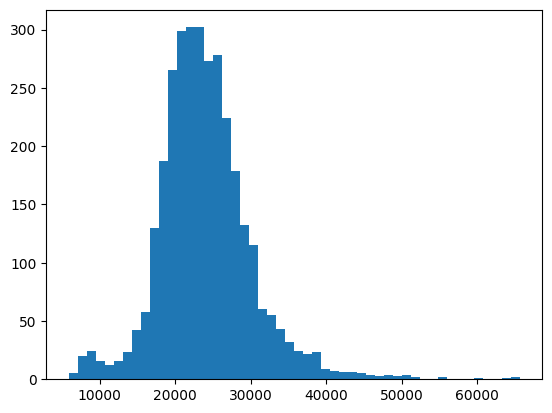

In [ ]:
plt.hist(df['IncomePerCap'], bins=50)

Izračunajte osnovne mjere u okviru deskriptivne statistike za broj stanovnika države (*TotalPop*) te prokomentirajte dobivene rezultate.

In [ ]:
df['TotalPop'].describe()

count    3.220000e+03
mean     9.940935e+04
std      3.193055e+05
min      8.500000e+01
25%      1.121800e+04
50%      2.603500e+04
75%      6.643050e+04
max      1.003839e+07
Name: TotalPop, dtype: float64

Pokušajte steći dublji uvid u broj stanovnika. Može li se prepoznati distribucija iz koje potječu ovi podaci? Potkrijepite Vaš zaključak grafičkom metodom i rezultatima statističkog testa.

(0.37787608613878587, 0.0009999999999998899)

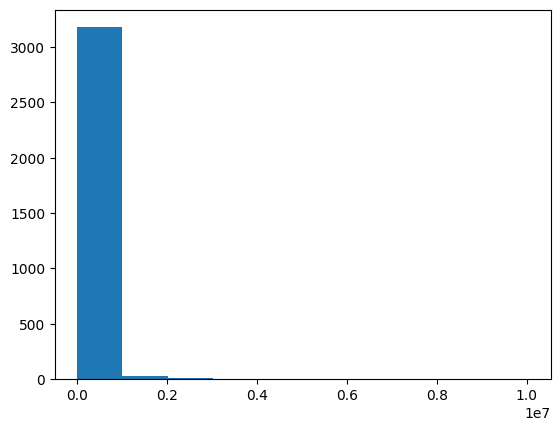

In [ ]:
plt.hist(df['TotalPop'])
diagnostic.kstest_normal(df['TotalPop'], dist='norm')

## **Zadatak 2: Ispitivanje odnosa između dvije varijable**

Pokušajte odgovoriti na pitanje je li dohodak po stanovniku države u korelaciji s nezaposlenošću. Ispitajte i linearnu i monotonu korelaciju.

In [ ]:
#df[['IncomePerCap', 'Unemployment']].corr(method='pearson')
stats.pearsonr(df['IncomePerCap'], df['Unemployment'])
#df[['IncomePerCap', 'Unemployment']].corr(method='spearman')
stats.spearmanr(df['IncomePerCap'], df['Unemployment'])

SignificanceResult(statistic=-0.5610346008485645, pvalue=1.861766816019713e-266)

## **Zadatak 3: Testiranje hipoteza**

Zarađuju li stanovnici države New York više od stanovnika države Kalifornija? Pokušajte dati odgovor na ovo pitanje pomoću deskriptivne statistike.

In [ ]:
print('New York:\n', df.loc[df['State'] == 'New York']['IncomePerCap'].describe())
print('\nCalifornia:\n', df.loc[df['State'] == 'California']['IncomePerCap'].describe())

New York:
 count       62.000000
mean     28189.758065
std       7196.801210
min      18456.000000
25%      24255.750000
50%      25891.000000
75%      30319.250000
max      64993.000000
Name: IncomePerCap, dtype: float64

California:
 count       58.000000
mean     27902.603448
std       8672.312531
min      16143.000000
25%      21409.000000
50%      27146.500000
75%      31214.500000
max      60236.000000
Name: IncomePerCap, dtype: float64


Kako bi potkrijepili dobivene zaključke, provedite testiranje hipoteza. Neka nulta hipoteza pretpostavlja da nema statistički značajne razlike u dohotku stanovnika ovih država. Testirajte hipotezu pomoću dvostranog t-testa (*two-sided t-test*). Prokomentirajte dobivenu $p$-vrijednost te donesite zaključak.

In [ ]:
import scipy.stats as st
data_thing = df.loc[df['State'] == 'New York']['IncomePerCap']
data_thing2 = df.loc[df['State'] == 'California']['IncomePerCap']
stats.ttest_ind(data_thing, data_thing2)

Ttest_indResult(statistic=0.19788117232375713, pvalue=0.8434785239169611)

## **Zadatak 4: Kvantificiranje nesigurnosti**

Ponovno promotrimo pitanje zarađuju li stanovnici države New York više od stanovnika države Kalifornija. Ovaj put pokušajte odgovoriti na pitanje pomoću intervala pouzdanosti s razinom pouzdanosti od 95%. Uz izračun, vizualizirajte intervale pouzdanosti na stupčastim dijagramima. 
Pomoć: provjerite preklapaju li se intervali za ove države.

New York:
 (26362.11277119949, 30017.40335783277)

California:
 (25622.335110090782, 30182.871786460943)


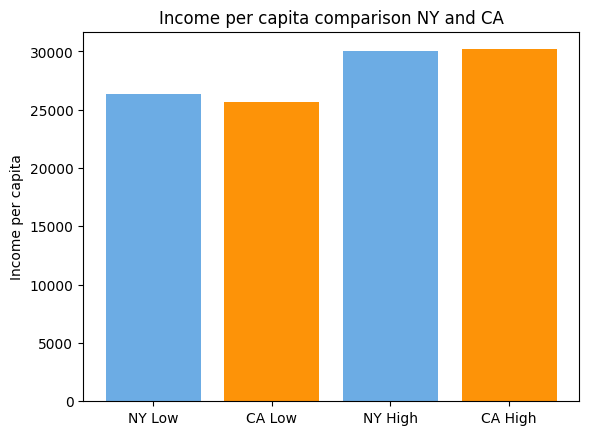

In [ ]:
import scipy.stats as st
data_thing = df.loc[df['State'] == 'New York']['IncomePerCap']
interval_NY = st.t.interval(confidence=0.95, df=len(data_thing)-1, loc=np.mean(data_thing), scale=st.sem(data_thing))
print('New York:\n', interval_NY)
data_thing2 = df.loc[df['State'] == 'California']['IncomePerCap']
interval_CA = st.t.interval(confidence=0.95, df=len(data_thing2)-1, loc=np.mean(data_thing2), scale=st.sem(data_thing2))
print('\nCalifornia:\n', interval_CA)

intervals = interval_NY + interval_CA

# x-coordinates of left sides of bars 
left = [1, 2, 3, 4]
  
# heights of bars
height = [interval_NY[0], interval_CA[0], interval_NY[1], interval_CA[1]]
  
# labels for bars
tick_label = ['NY Low', 'CA Low', 'NY High', 'CA High']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['#6CACE4', '#FD9308'])
  
# naming the x-axis
# naming the y-axis
plt.ylabel('Income per capita')
# plot title
plt.title('Income per capita comparison NY and CA')
  
# function to show the plot
plt.show()

## **Zadatak 5: Jačanje gospodarstva poticanjem samozapošljavanja**

Pretpostavimo da je najveći prioritet lokalne uprave u 2018. godini povećanje dohotka po glavi stanovnika. U tu svrhu, dužnosnici planiraju usvojiti strategiju poticanja samozapošljavanja kroz niz kampanja, obrazovnih programa i namjenskih sredstava.

Budući da je neetično i nemoguće u ovom okruženju provoditi kontrolirani eksperiment koji uključuje građane (primjerice, otpustiti zaposlenike i prisiliti ih na samozapošljavanje), dužnosnici su od Vas zatražili da utvrdite učinak samozapošljavanja na gospodarstva, oslanjajući se na podatke iz danog skupa podataka.

Koristeći odgovarajuće grafičke i statističke metode, odredite i kvantificirajte vezu između postotka samozaposlenih građana (*SelfEmployed*) i dohotka po glavi stanovnika u svih 3212 država SAD-a. Zarađuju li građani u državama koje imaju veći postotak samozaposlenih više po glavi stanovnika?

In [ ]:
stats.pearsonr(df['SelfEmployed'], df['IncomePerCap'])

PearsonRResult(statistic=0.08727386609551786, pvalue=7.052861196524553e-07)

Pilot program ove strategije zahvatit će sve okruge unutar ograničenog skupa od tri države. Skup A uključuje Wisconsin, Tennessee i Minnesotu. Kvantificirajte ovisnost dohotka po glavi stanovnika o stopama samozapošljavanja u skupu A.

In [ ]:
three_countries = df.loc[df['State'].isin(['Wisconsin', 'Tennessee', 'Minnesota'])]
stats.pearsonr(three_countries['SelfEmployed'], three_countries['IncomePerCap'])

PearsonRResult(statistic=-0.202293507365215, pvalue=0.0011881639322138561)

U kojoj je državi unutar skupa A opaženi učinak samozapošljavanja na dohodak po glavi stanovnika najjači? Je li ovaj učinak pozitivan ili negativan?

In [ ]:
Wisconsin = df.loc[df['State'].isin(['Wisconsin'])]
Tennessee = df.loc[df['State'].isin(['Tennessee'])]
Minnesota = df.loc[df['State'].isin(['Minnesota'])]

Wisconsin = stats.pearsonr(Wisconsin['SelfEmployed'], Wisconsin['IncomePerCap'])
Tennessee = stats.pearsonr(Tennessee['SelfEmployed'], Tennessee['IncomePerCap'])
Minnesota = stats.pearsonr(Minnesota['SelfEmployed'], Minnesota['IncomePerCap'])
print(Wisconsin[0])
print(Tennessee[0])
print(Minnesota[0])

print('Wisconsin')

-0.32905300016378525
-0.23836048684913153
-0.2538551921654062
Wisconsin


Skup B uključuje države New Jersey, Kansas i Rhode Island. Ponovite analizu iz prijašnjih koraka, ali sada za skup B. U kojem biste od dva skupa A i B preporučili poticanje samozapošljavanja? Objasnite svoje razmišljanje. Što zamjećujete kad u oba skupa promatrate korelaciju unutar svake pojedine države, a što kada promatrate korelaciju za države u cjelini?

In [ ]:
three_countries = df.loc[df['State'].isin(['New Jersey', 'Kansas', 'Rhode Island'])]
print('All: ', stats.pearsonr(three_countries['SelfEmployed'], three_countries['IncomePerCap']))

NewJersey = df.loc[df['State'].isin(['New Jersey'])]
Kansas = df.loc[df['State'].isin(['Kansas'])]
RhodeIsland = df.loc[df['State'].isin(['Rhode Island'])]

NewJersey = stats.pearsonr(NewJersey['SelfEmployed'], NewJersey['IncomePerCap'])
Kansas = stats.pearsonr(Kansas['SelfEmployed'], Kansas['IncomePerCap'])
RhodeIsland = stats.pearsonr(RhodeIsland['SelfEmployed'], RhodeIsland['IncomePerCap'])
print(NewJersey[0])
print(Kansas[0])
print(RhodeIsland[0])

print('Rhode Island')

All:  PearsonRResult(statistic=-0.2322214134608569, pvalue=0.007607493042857383)
0.48044784713362815
0.25810299714436924
0.9021788382149803
Rhode Island
